toDo:
* Make seed so that it becomes reproducable
* plots.plot_tumor_fraction(tf_mix2) need to be better

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%load_ext autoreload
%autoreload 2
import utils
import models
import plots

In [2]:
SEED  = 0

# Read the TSV file
end_motifs = pd.read_csv("/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Jessica_LOD/data/end_motifs_rel_freq_wide.tsv", sep="\t")

# Filter out rows where 'split' is NaN
end_motifs = end_motifs.dropna(subset=["split"])



# Set 'library' as the index
end_motifs.set_index("library", inplace=True)

# Display the first few rows
display(end_motifs.head())

,cohort,split,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
library,,,,,,,,,,,,,,,,,,,,,
58,Healthy,testing,0.017851,0.005338,0.007191,0.009819,0.006293,0.003137,0.000594,0.004692,...,0.000189,0.003500,0.001840,0.001244,0.001509,0.002165,0.003594,0.003167,0.002615,0.007131
73,Healthy,training,0.016660,0.004990,0.006517,0.008438,0.006435,0.003140,0.000586,0.004465,...,0.000172,0.003284,0.001636,0.001085,0.001273,0.001917,0.003208,0.002814,0.002198,0.006449
74,Healthy,testing,0.019975,0.005054,0.006948,0.009034,0.006104,0.002998,0.000563,0.004247,...,0.000215,0.003774,0.001988,0.001303,0.001532,0.002246,0.003722,0.003351,0.002691,0.008220
81,Healthy,testing,0.017379,0.004964,0.006705,0.008887,0.006338,0.003094,0.000567,0.004478,...,0.000197,0.003539,0.001974,0.001259,0.001527,0.002210,0.003675,0.003117,0.002628,0.007407
83,Healthy,training,0.014704,0.006508,0.007960,0.011705,0.007044,0.004093,0.000619,0.005523,...,0.000128,0.002317,0.001282,0.000968,0.001269,0.001583,0.002274,0.002233,0.001828,0.005385


In [3]:
end_motifs_train = end_motifs[end_motifs["split"] == "training"].drop(columns=["split"])

display(end_motifs_train.head())

,cohort,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
library,,,,,,,,,,,,,,,,,,,,,
73,Healthy,0.016660,0.004990,0.006517,0.008438,0.006435,0.003140,0.000586,0.004465,0.006019,...,0.000172,0.003284,0.001636,0.001085,0.001273,0.001917,0.003208,0.002814,0.002198,0.006449
83,Healthy,0.014704,0.006508,0.007960,0.011705,0.007044,0.004093,0.000619,0.005523,0.006073,...,0.000128,0.002317,0.001282,0.000968,0.001269,0.001583,0.002274,0.002233,0.001828,0.005385
BC001_UC1,Bladder,0.016535,0.005324,0.007508,0.009616,0.006108,0.003144,0.000601,0.004771,0.006282,...,0.000187,0.003502,0.001810,0.001253,0.001473,0.002178,0.003639,0.003261,0.002659,0.007134
BC002_UC1,Bladder,0.017899,0.005202,0.007202,0.009023,0.006150,0.003082,0.000570,0.004407,0.006390,...,0.000182,0.003280,0.001841,0.001216,0.001442,0.002139,0.003379,0.002966,0.002562,0.007148
BC003_UC1,Bladder,0.018909,0.005286,0.007294,0.009368,0.006270,0.003152,0.000600,0.004572,0.006487,...,0.000186,0.003569,0.001687,0.001154,0.001387,0.002009,0.003427,0.003132,0.002457,0.007685


In [4]:
#end_motifs_LogReg = models.train_model(end_motifs_train, "cohort")



# Train LASSO model
#end_motifs_LogReg = models.train_model(end_motifs_train, "cohort", LogisticRegression(penalty="l1", solver="saga", C=1/0.01, max_iter=5000, random_state=SEED))


# param_grid_log_reg = [
#     {
#         'penalty': ['l2'],         
#         'C': [0.01, 0.1, 1, 10, 100],
#         'solver': ['lbfgs'],       
#         'max_iter': [ 5000]
#     },
#     {
#         'penalty': ['l1', 'l2'],   
#         'C': [0.01, 0.1, 1, 10, 100],
#         'solver': ['liblinear','saga'],   
#         'max_iter': [ 5000]
#     },
#     {
#         'penalty': ['elasticnet'],  # Only include 'elasticnet' here
#         'C': [0.01, 0.1, 1, 10, 100],
#         'solver': ['saga'],         
#         'max_iter': [5000],
#         'l1_ratio': [0.5]           # Only used with 'elasticnet'
#     }
# ]

param_grid_log_reg = [
    {
        'penalty': ['l2'],         
        'C': [0.001, 0.01, 0.1, 1],  # ✅ Reduced C range
        'solver': ['lbfgs'],       
        'max_iter': [5000]
    },
    {
        'penalty': ['l1', 'l2'],   
        'C': [0.001, 0.01, 0.1, 1],  # ✅ Reduced C range
        'solver': ['liblinear'],   # ❌ Removed 'saga' for small data
        'max_iter': [5000]
    },
    {
        'penalty': ['elasticnet'],  
        'C': [0.001, 0.01, 0.1, 1],  # ✅ Reduced C range
        'solver': ['saga'],         
        'max_iter': [5000],
        'l1_ratio': [0.1, 0.2, 0.3]  # ✅ Reduced l1_ratio for better stability
    }
]



end_motifs_LogReg = models.train_model(
    end_motifs_train, 
    "cohort", 
    LogisticRegression, 
    param_grid_log_reg, 
    cv=5
)


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best hyperparameters found: {'model__C': 1, 'model__l1_ratio': 0.1, 'model__max_iter': 5000, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}


In [5]:
end_motifs_test = end_motifs[end_motifs["split"] == "testing"].drop(columns=["split"])
display(end_motifs_test.head())

,cohort,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
library,,,,,,,,,,,,,,,,,,,,,
58,Healthy,0.017851,0.005338,0.007191,0.009819,0.006293,0.003137,0.000594,0.004692,0.006364,...,0.000189,0.003500,0.001840,0.001244,0.001509,0.002165,0.003594,0.003167,0.002615,0.007131
74,Healthy,0.019975,0.005054,0.006948,0.009034,0.006104,0.002998,0.000563,0.004247,0.006512,...,0.000215,0.003774,0.001988,0.001303,0.001532,0.002246,0.003722,0.003351,0.002691,0.008220
81,Healthy,0.017379,0.004964,0.006705,0.008887,0.006338,0.003094,0.000567,0.004478,0.006205,...,0.000197,0.003539,0.001974,0.001259,0.001527,0.002210,0.003675,0.003117,0.002628,0.007407
BC011_UC1,Bladder,0.016466,0.004404,0.005893,0.006719,0.005894,0.002917,0.000550,0.003891,0.005596,...,0.000177,0.002924,0.001618,0.000951,0.001100,0.001669,0.002915,0.002632,0.002007,0.005920
BC016_UC1,Bladder,0.020012,0.004494,0.006236,0.007797,0.005870,0.002696,0.000517,0.003676,0.006053,...,0.000241,0.003444,0.002679,0.001445,0.001669,0.002408,0.004103,0.003233,0.002739,0.008075


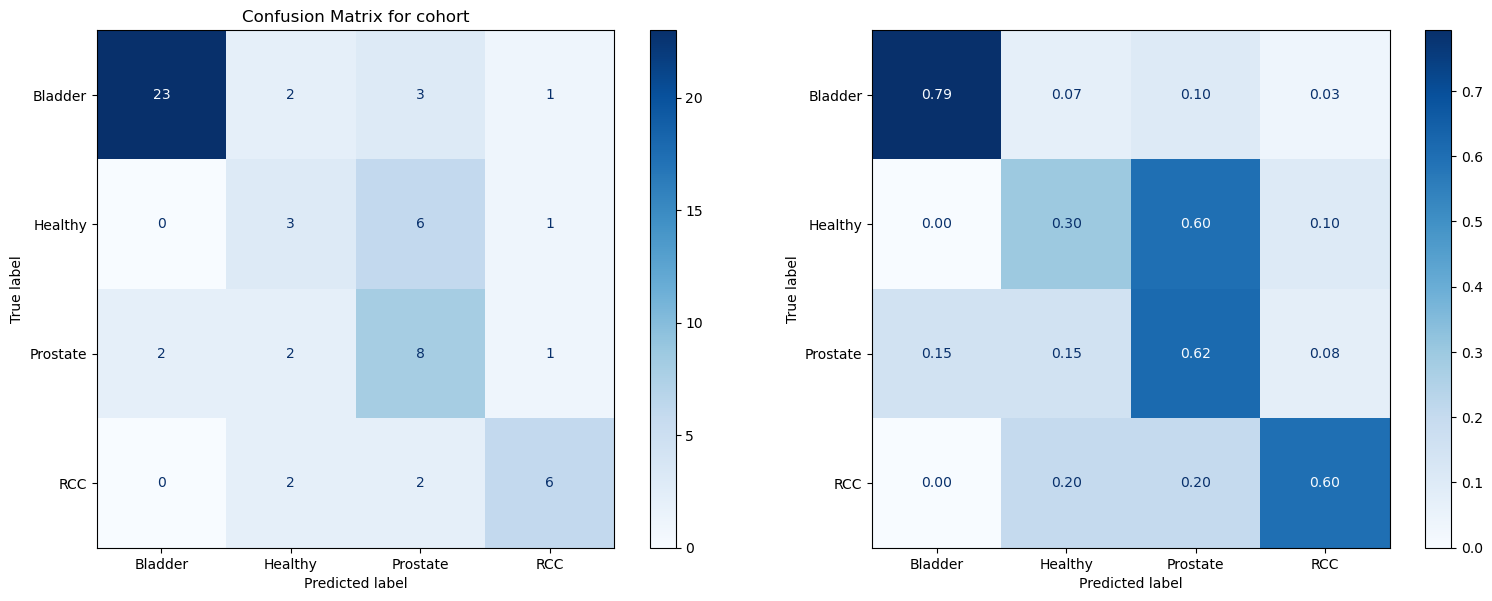

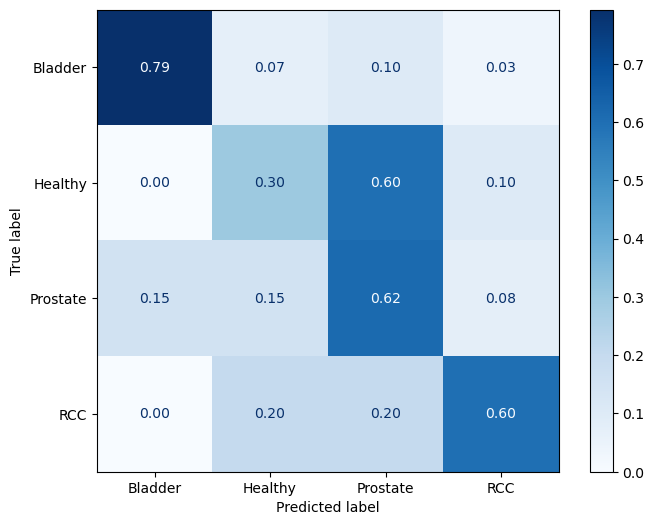

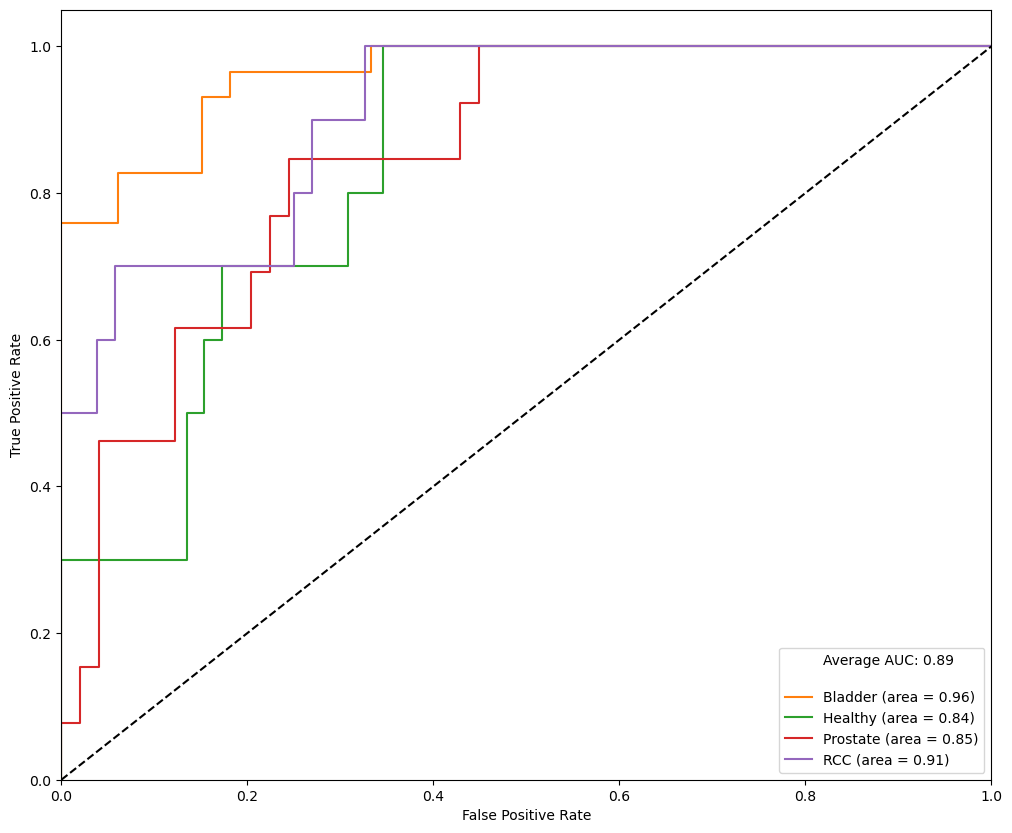

0.8890649990403685

In [6]:
_,auc = models.predict_model(end_motifs_LogReg, end_motifs_test, plot_cm=True, plot_roc=True)
auc


🔍 Performing Grid Search with k-Fold CV to find best hyperparameters (on train data only)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best hyperparameters found: {'model__C': 1, 'model__l1_ratio': 0.1, 'model__max_iter': 5000, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}

🎯 Running LOOCV with the best hyperparameters on (train + test) data...


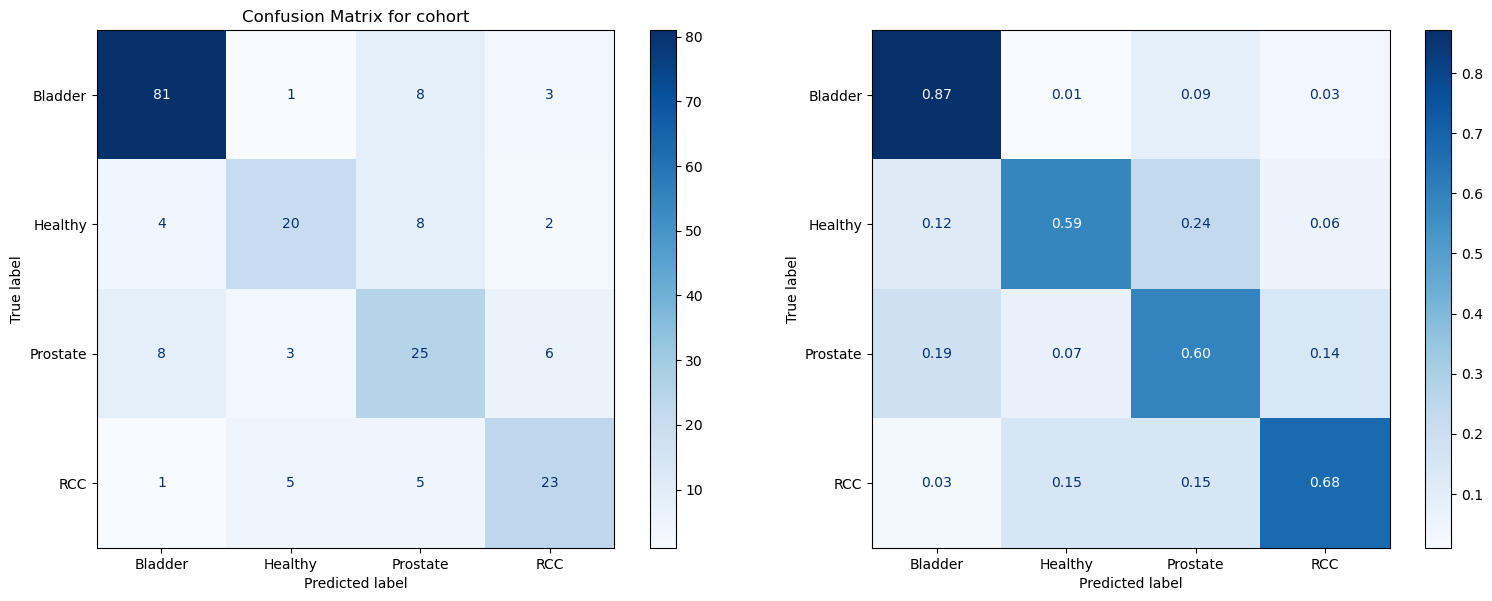

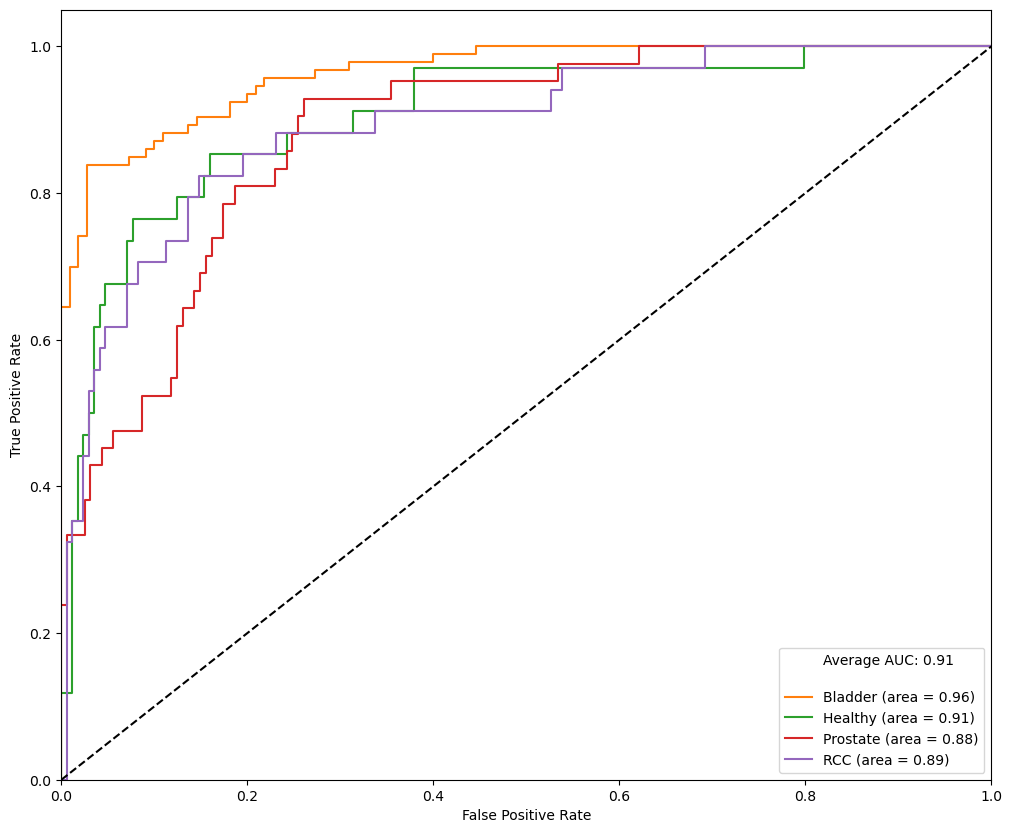


📊 Final LOOCV AUC Score: 0.9112

🚀 Training final model on the full dataset with best hyperparameters...


0.9111853276264601

In [7]:
loocv_endmotif_logreg, loocv_auc = models.train_model_loocv(
    end_motifs_train, end_motifs_test, "cohort", LogisticRegression, param_grid_log_reg
)
#end_motifs_test
loocv_auc

# LOD

In [8]:
# Read the TSV file
end_motifs_mix = pd.read_csv("/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Jessica_LOD/data/end_motifs_mix_rel_freq_wide.tsv", sep="\t", index_col=0)


# Display the first few rows
display(end_motifs_mix.head())

,cohort,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
library,,,,,,,,,,,,,,,,,,,,,
bladder_0.1,Bladder,0.018274,0.005381,0.007093,0.009912,0.006375,0.003071,0.000576,0.004612,0.006384,...,0.000206,0.003557,0.002157,0.001305,0.001576,0.002340,0.003955,0.003333,0.002843,0.007649
bladder_1,Bladder,0.018290,0.005373,0.007084,0.009891,0.006369,0.003069,0.000575,0.004605,0.006380,...,0.000206,0.003556,0.002155,0.001303,0.001574,0.002336,0.003954,0.003332,0.002838,0.007651
bladder_10,Bladder,0.018464,0.005292,0.006986,0.009687,0.006326,0.003053,0.000574,0.004525,0.006346,...,0.000205,0.003540,0.002136,0.001284,0.001542,0.002302,0.003953,0.003320,0.002797,0.007672
bladder_25,Bladder,0.018750,0.005168,0.006814,0.009361,0.006249,0.003027,0.000569,0.004397,0.006280,...,0.000204,0.003511,0.002111,0.001254,0.001486,0.002243,0.003944,0.003296,0.002734,0.007699
bladder_5,Bladder,0.018367,0.005334,0.007041,0.009798,0.006347,0.003063,0.000575,0.004569,0.006367,...,0.000206,0.003550,0.002146,0.001295,0.001559,0.002322,0.003953,0.003326,0.002819,0.007664


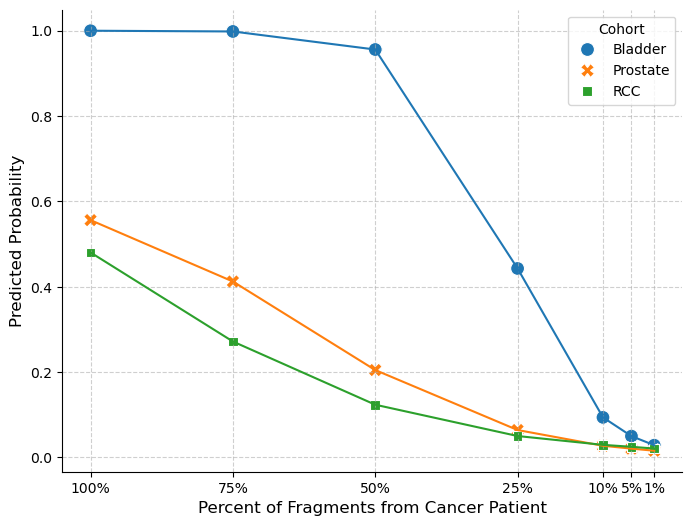

In [9]:
utils.LOD_analysis(end_motifs_LogReg, end_motifs_mix)

# MIX 2

In [10]:
end_motifs_mix2 = pd.read_csv("/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Jessica_LOD/data/end_motifs_mix2_rel_freq_wide.tsv", sep="\t", index_col=0)
#end_motifs_mix2 = end_motifs_mix2.drop(columns=['file','original_library'])

display(end_motifs_mix2.head())

,cohort,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,...,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,file,original_library
library,,,,,,,,,,,,,,,,,,,,,
BC011_0.02,Bladder,0.017982,0.005235,0.006920,0.009439,0.006311,0.003050,0.000575,0.004503,0.006261,...,0.002079,0.001252,0.001515,0.002247,0.003806,0.003228,0.002717,0.007394,/home/jupyter/jlinford/urine/mix/mixture_outpu...,BC011
BC011_0.04,Bladder,0.017724,0.005097,0.006743,0.008973,0.006237,0.003029,0.000570,0.004398,0.006141,...,0.002000,0.001201,0.001445,0.002151,0.003654,0.003125,0.002597,0.007143,/home/jupyter/jlinford/urine/mix/mixture_outpu...,BC011
BC011_0.06,Bladder,0.017461,0.004950,0.006558,0.008512,0.006166,0.003005,0.000565,0.004298,0.006024,...,0.001920,0.001145,0.001374,0.002049,0.003502,0.003023,0.002476,0.006892,/home/jupyter/jlinford/urine/mix/mixture_outpu...,BC011
BC011_0.08,Bladder,0.017194,0.004808,0.006377,0.008046,0.006097,0.002981,0.000562,0.004193,0.005906,...,0.001840,0.001097,0.001305,0.001948,0.003345,0.002924,0.002350,0.006635,/home/jupyter/jlinford/urine/mix/mixture_outpu...,BC011
BC011_0.10,Bladder,0.016937,0.004671,0.006199,0.007574,0.006024,0.002954,0.000561,0.004087,0.005795,...,0.001758,0.001044,0.001234,0.001851,0.003193,0.002820,0.002231,0.006381,/home/jupyter/jlinford/urine/mix/mixture_outpu...,BC011


In [11]:
# Load the data
tumor_fraction = pd.read_csv("/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Jessica_LOD/data/tf_mix2_low_1Mb.txt", sep="\t")

# Rename 'library' column to 'mix_name'
tumor_fraction = tumor_fraction.rename(columns={'library': 'mix_name'})

# Extract 'orig_lib' and 'est_tf' from 'mix_name' by splitting at '_'
tumor_fraction['orig_lib'] = tumor_fraction['mix_name'].str.split('_').str[0]
tumor_fraction['est_tf'] = pd.to_numeric(tumor_fraction['mix_name'].str.split('_').str[1], errors='coerce')

# Select required columns
tumor_fraction = tumor_fraction[['mix_name', 'orig_lib', 'est_tf', 'tumor_fraction']]

# Display the DataFrame
display(tumor_fraction.head())

,mix_name,orig_lib,est_tf,tumor_fraction
0,BC011_0.02,BC011,0.02,0.08745
1,BC011_0.04,BC011,0.04,0.18680
2,BC011_0.06,BC011,0.06,0.28340
3,BC011_0.08,BC011,0.08,0.38060
4,BC011_0.10,BC011,0.10,0.08311


In [12]:
##plots.plot_tumor_fraction(tumor_fraction) #Need to make it better

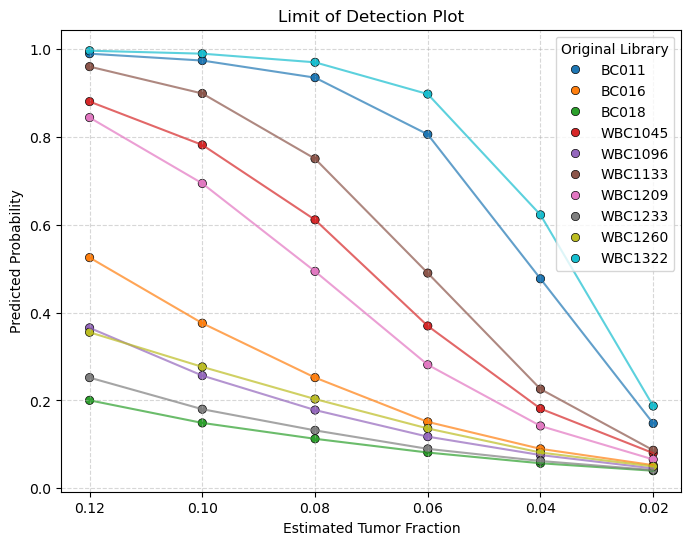

In [13]:
utils.LOD_analysis2(end_motifs_LogReg, end_motifs_mix2, tumor_fraction)